# Taylor i to variabler

Demo af Christian Mikkelstrup og Hans Henrik Hermansen

In [ ]:
from sympy import *
init_printing()
from dtumathtools import *

## Approksimerende polynomier
Vi betragter følgende funktion af to variabler

$$
f(x,y) = \sin(x^2 + y^2)
$$

Den er plottet herunder

In [ ]:
x,y = symbols("x y")
f = sin(x ** 2 + y ** 2)
dtuplot.plot3d(f,(x,-1.5,1.5),(y,-1.5,1.5),rendering_kw={"color" : "blue"})

Lad os udregne det approksimerende 1. gradspolynomium i udviklingspunktet $(0,0)$

In [ ]:
P1 = dtutools.taylor(f,[x,0,y,0],degree=2)
P1

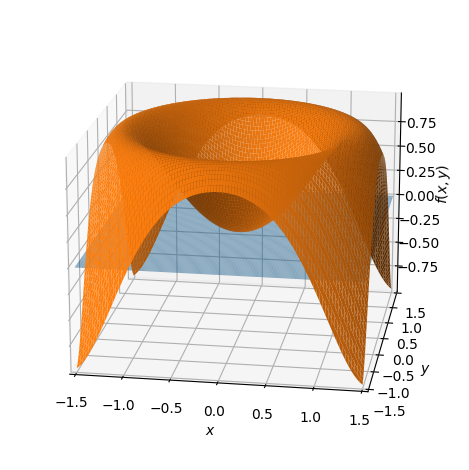

In [ ]:
p = dtuplot.plot3d(P1,(x,-1.5,1.5),(y,-1.5,1.5),show=false,rendering_kw={"alpha" : 0.5},camera={"azim":-81,"elev":18})
p.extend(dtuplot.plot3d(f,(x,-1.5,1.5),(y,-1.5,1.5),show=False))
p.show()

Her kan vi se at $P1$ ligger i $(x,y)$ planen. 

Lad os se hvordan det approksimerende 2. gradspolynomium ser ud.

In [ ]:
P2 = dtutools.taylor(f,[x,0,y,0],3)
P2

In [ ]:
dtuplot.plot3d(f,P2,(x,-1.5,1.5),(y,-1.5,1.5))

Denne gang er det approksimerende polynomium en elliptisk parabloide.
Lad os til sidst prøve at se hvordan, det approksimerende 6. gradspolyniom ser ud.

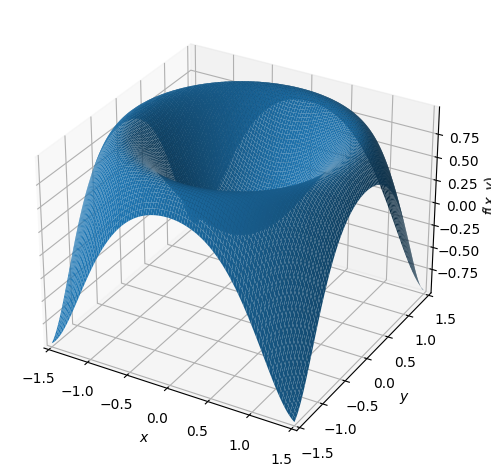

In [ ]:
P6 = dtutools.taylor(f,[x,0,y,0],7)
p = dtuplot.plot3d(f,(x,-1.5,1.5),(y,-1.5,1.5),show=False)
p.legend=True
p.show()


Som forventet ligger de nu meget tættere på hinanden.
Lad os undersøge fejlen for de polynomier i nogle forskellige punkter for at se, hvor godt de passer.
Lad starte med $(0.2,0.2)$.

In [ ]:
f_p1 = f.subs([(x,1/5),(y,1/5)])
P1_p1 = P1.subs([(x,1/5),(y,1/5)])
P2_p1 = P2.subs([(x,1/5),(y,1/5)])
P6_p1 = P6.subs([(x,1/5),(y,1/5)])

f_p1 - P1_p1, f_p1 - P2_p1, f_p1 - P6_p1

Det hele ser rigtigt ud. Fejlen er meget mindre for de approksimerende polynomier af højere grad.
Lad os prøve med $(0.5,0.5)$

In [ ]:
f_p2 = f.subs([(x,1/2),(y,1/2)])
P1_p2 = P1.subs([(x,1/2),(y,1/2)])
P2_p2 = P2.subs([(x,1/2),(y,1/2)])
P6_p2 = P6.subs([(x,1/2),(y,1/2)])

f_p2 - P1_p2, f_p2 - P2_p2, f_p2 - P6_p2

Jo længere væk vi kommer fra udviklingspunktet $(0,0)$ jo større fejl må vi forvente. 

(Det skal nævnes, at vores sammenligninger baserer sig på antagelsen om, at SymPy's egne approksimeringer er bedre end vores. Det er nok en ret god antagelse i det her tilfælde, men det er vigtigt at vide, at SymPy, Maple og alle andre computerredskaber også approksimerer.)

## Andengradspolynomium på matrixform

Vi betragter følgende 2. gradspolynomium af tre variable

$$
f(x,y,z) = 7x^2 - 4xy + 6y^2 - 4yz + 5z^2 - 2x + 20y -10z
$$

De første fem led i $f$ udgør en **kvadratisk form** $k$. Altså de led i $f$, der enten består af kvadratiske eller blandede produkter.
For at opskrive $k$ på matrix form skal beregne $f$'s Hessematrix. For at gøre dette opretter vi igen en hjælpefunktion med noget python magi, der gør det nemmere fremover.

In [ ]:
z = symbols("z")
f = 7*x**2 - 4*x*y + 6*y**2 - 4*y*z + 5*z**2 - 2*x + 20*y - 10*z
H = dtutools.hessian(f)
H

Udfra vores Hessematrix $H$ kan vi nu opskrive $k$ på matrixform på følgende måde

$$
A = \frac{1}{2} H \\
k = \begin{bmatrix} x & y & z \end{bmatrix} A \begin{bmatrix} x \\ y \\ z \end{bmatrix}
$$

In [ ]:
var_vec = Matrix([x,y,z])
A = S(1)/2 * H
k = (var_vec.T * A * var_vec)[0].expand()
k

De led i $f$, der ikke tilhører $k$, kan opskrives som følgende matrix

$$
\begin{bmatrix} -2 & 20 & -10 \end{bmatrix}
$$

Nu kan vi så opskrive hele $f$ på matrix form

$$
f(x,y,z) = \begin{bmatrix} x & y & z \end{bmatrix} A \begin{bmatrix} x \\ y \\ z \end{bmatrix} + \begin{bmatrix} -2 & 20 & -10 \end{bmatrix} \begin{bmatrix} x \\ y \\ z \end{bmatrix}
$$

In [ ]:
f_matrix = k + (Matrix([-2,20,-10]).T * var_vec)[0]
f_matrix